### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

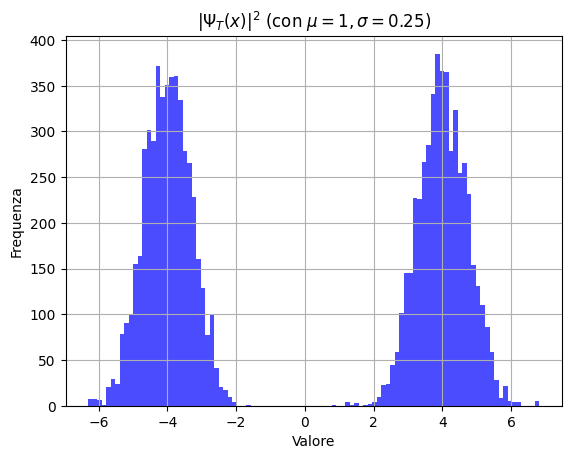

In [9]:
import matplotlib.pyplot as plt

# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_8\lez8_1\output.txt', 'r') as file:
    dati = [float(line.strip()) for line in file]

# Crea l'istogramma
plt.hist(dati, bins=100, color='blue', alpha=0.7)  # Specifica il numero di bins (suddivisioni) qui
plt.xlabel('Valore')  # Etichetta sull'asse x
plt.ylabel('Frequenza')  # Etichetta sull'asse y
plt.title(r'$|\Psi_T(x)|^2$ (con $\mu=1, \sigma=0.25)$')  # Titolo dell'istogramma
plt.grid(True)  # Mostra la griglia
plt.show()


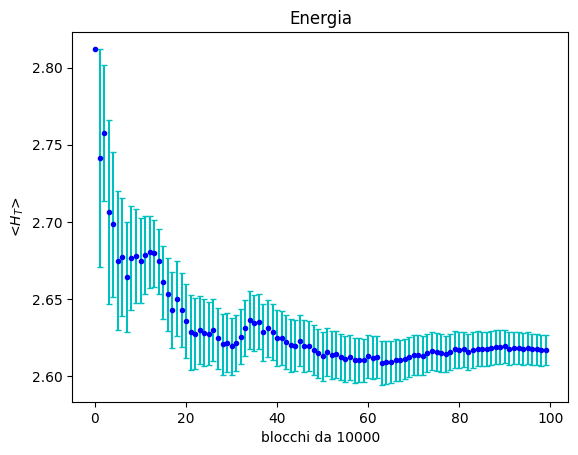

In [19]:
import numpy as np

E = []
err = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_8\lez8_1\energy.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        E.append(float(values[0]))
        err.append(float(values[1]))

x = np.arange(len(E)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x, E, yerr=err, fmt='o', capsize=2, color='blue', ecolor='c', markersize=3)
plt.xlabel('blocchi da 10000')
plt.ylabel('<$H_T$>')
plt.title('Energia')

plt.show()

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

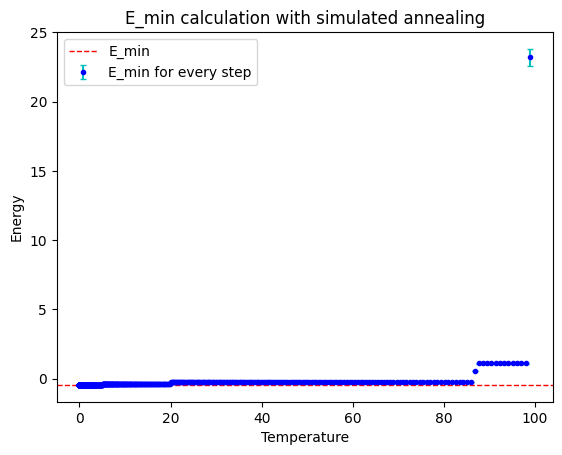

In [14]:
# Leggi i dati dal file
data = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_8\lez8_2\energy.txt', delimiter=',')

# Estrai le colonne rilevanti
y = data[:, 0]           # Prima colonna
yerr = data[:, 1]        # Seconda colonna
temperature = data[:, 4] # Quinta colonna

# Crea il plot con barre di errore
plt.errorbar(temperature, y, yerr=yerr, fmt='o', capsize=2, color='blue', ecolor='c', markersize=3, label='E_min for every step')
plt.axhline(y=-0.445163, color='red', linestyle='--', linewidth=1, label='E_min')

# Aggiungi titoli e etichette
plt.title('E_min calculation with simulated annealing')
plt.xlabel('Temperature')
plt.ylabel('Energy')

# Mostra la legenda
plt.legend()

# Mostra il plot
plt.show()

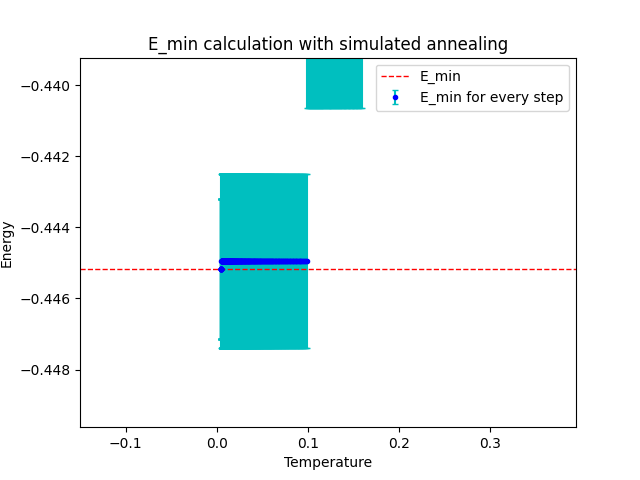

In [15]:
from IPython.display import Image, display

# Percorso dell'immagine
image_path = r'C:\Users\Utente\Pictures\Saved Pictures\annealing.png'

# Visualizzazione dell'immagine
display(Image(filename=image_path))

Il valore di energia minimo trovato è $E_{min}=-0.445163 \pm 0.00196367$. Non ha senso continuare nuovamente la ricerca poichè l'ultimo valore trovato è dntro la barra d'errore del precedente.

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Utente\AppData\Local\Temp\ipykernel_6640\3143294568.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Energia (con $\mu_{best}=0.798357$ e $\sigma_{best}=0.604245$)')


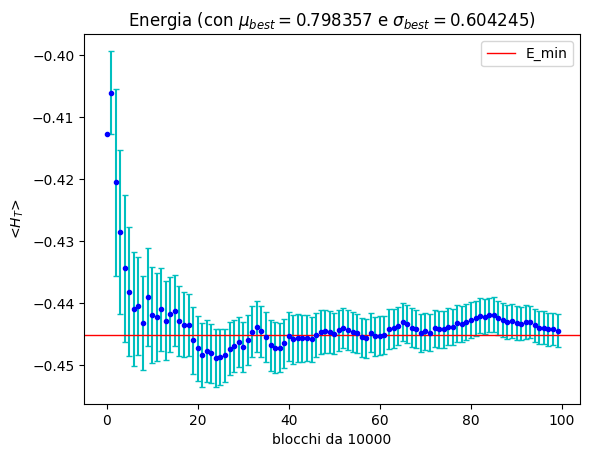

In [23]:
E = []
err = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_8\lez8_2\energy_blocks.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        E.append(float(values[0]))
        err.append(float(values[1]))

x = np.arange(len(E)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x, E, yerr=err, fmt='o', capsize=2, color='blue', ecolor='c', markersize=3)
plt.axhline(y=-0.445163, color='red', linestyle='solid', linewidth=1, label='E_min')
plt.xlabel('blocchi da 10000')
plt.ylabel('<$H_T$>')
plt.title('Energia (con $\mu_{best}=0.798357$ e $\sigma_{best}=0.604245$)')
plt.legend()

plt.show()

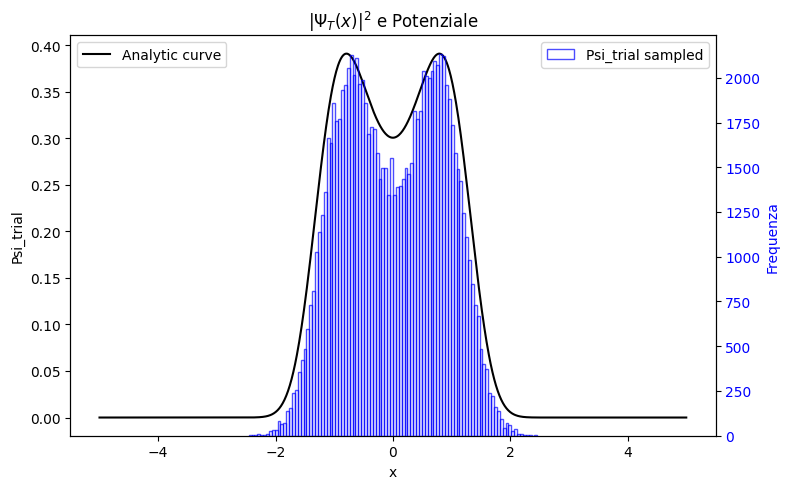

In [27]:
# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_8\lez8_2\isto.txt', 'r') as file:
    dati = [float(line.strip()) for line in file]

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E, psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)

# Plot a few things
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primo subplot: il potenziale
ax1.plot(x, (psi[0])**2, color='black', label="Analytic curve")
ax1.set_xlabel('x')
ax1.set_ylabel('Psi_trial', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Crea un secondo asse y
ax2 = ax1.twinx()
ax2.hist(dati, bins=100, edgecolor='blue', facecolor='none', alpha=0.7, label="Psi_trial sampled")
ax2.set_ylabel('Frequenza', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

# Titolo e legenda
plt.title(r'$|\Psi_T(x)|^2$ e Potenziale')
fig.tight_layout()  # Aggiusta il layout
plt.show()